Import Necessary Modules




In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Loading Excel file into Pandas DataFrame


In [2]:
file_path = "Assignment for Data Scientist.xlsx"
sheet_name = "Sheet1"
df = pd.read_excel(file_path, sheet_name=sheet_name)

Saving Seperated Sheet to New Excel Sheet

In [3]:
output_path = "new_excel.xlsx"
df.to_excel(output_path, index=False)

Converting New Excel to CSV

In [4]:
df1 = pd.read_excel(output_path)
output_path_new = "new_csv.csv"
df1.to_csv(output_path_new, index=False)

Dataset Overview


In [5]:
df1.head()

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,BU79786,Christine,Dhaka,F,Married,42,56274
1,QZ44356,Susan,Rajshahi,F,Single,32,0
2,AI49188,Margaret,Khulna,F,Married,48,48767
3,WW63253,David,Barishal,M,Married,32,0
4,HB64268,Peter,Mymensingh,M,Single,24,43836


Dropping "ID" from the Dataset


In [6]:
column_to_drop = 'ID'
df1 = df1.drop(columns=column_to_drop)

In [7]:
df1.head()

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,Dhaka,F,Married,42,56274
1,Susan,Rajshahi,F,Single,32,0
2,Margaret,Khulna,F,Married,48,48767
3,David,Barishal,M,Married,32,0
4,Peter,Mymensingh,M,Single,24,43836


Encoding the Categorical Columns

In [8]:
encoded_data = df1.copy()
label_encoder = LabelEncoder()

for column in encoded_data.columns:
     if column == "Customer Name":
      pass
     else:
      if encoded_data[column].dtype == 'object':
        fit_encoded_data =  label_encoder.fit_transform(encoded_data[column])
        encoded_data[column] =  fit_encoded_data
        print(label_encoder.fit(df1[column]).classes_)

['Barishal' 'Chattogram' 'Dhaka' 'Khulna' 'Mymensingh' 'Rajshahi'
 'Rangpur' 'Sylhet']
['F' 'M']
['Divorced' 'Married' 'Single']


Overview of the Encoded Columns


In [9]:
encoded_data.head()
# The encoded columns 'Division', 'Gender' and 'MaritalStatus' are encoded on ascending order

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,2,0,1,42,56274
1,Susan,5,0,2,32,0
2,Margaret,3,0,1,48,48767
3,David,0,1,1,32,0
4,Peter,4,1,2,24,43836


Saving The Encoded Data


In [10]:
encoded_data.to_csv('assignment_python.csv', index=False)

Applying K-Means Clustering Based on the Division


In [11]:
data = encoded_data
X = data[['Division']]
kmeans = KMeans(n_clusters=8)  #Total Number of Unique Division is 8
kmeans.fit(X)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting Income vs. Division


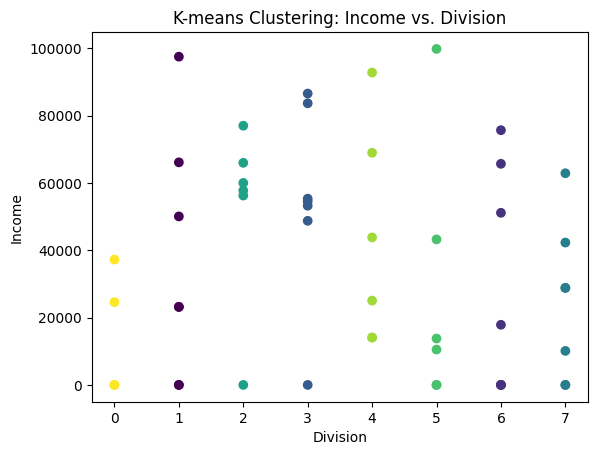

In [12]:
plt.scatter(data['Division'], data['Income'], c=labels, cmap='viridis')
plt.xlabel('Division')
plt.ylabel('Income')
plt.title('K-means Clustering: Income vs. Division')
plt.show()

Plotting Number of Sample Data Points per Division

<Axes: title={'center': 'Number of Sample Data Points per Division'}, xlabel='Division', ylabel='Sample Data Points'>

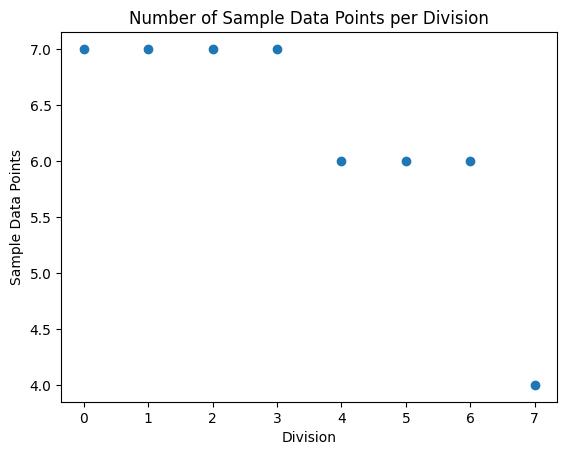

In [13]:
plt.title('Number of Sample Data Points per Division')
plt.xlabel('Division')
plt.ylabel('Sample Data Points')
#plt.show()
value_per_cluster = pd.value_counts(labels)
value_per_cluster.plot(style=['o' , 'rx'])